In [2]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, accuracy_score


In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
df = pd.read_csv("../Resources/housing.csv")
# Review the DataFrame
# YOUR CODE HERE!
df = df.fillna(0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Look at correlation matrix
print(df.corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068082 -0.065318           -0.317063     0.920196   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068082    0.099773    0.055310      -0.015176   
latitude                 -0.065318   -0.108785   -0.071035      -0.079809   
housing_

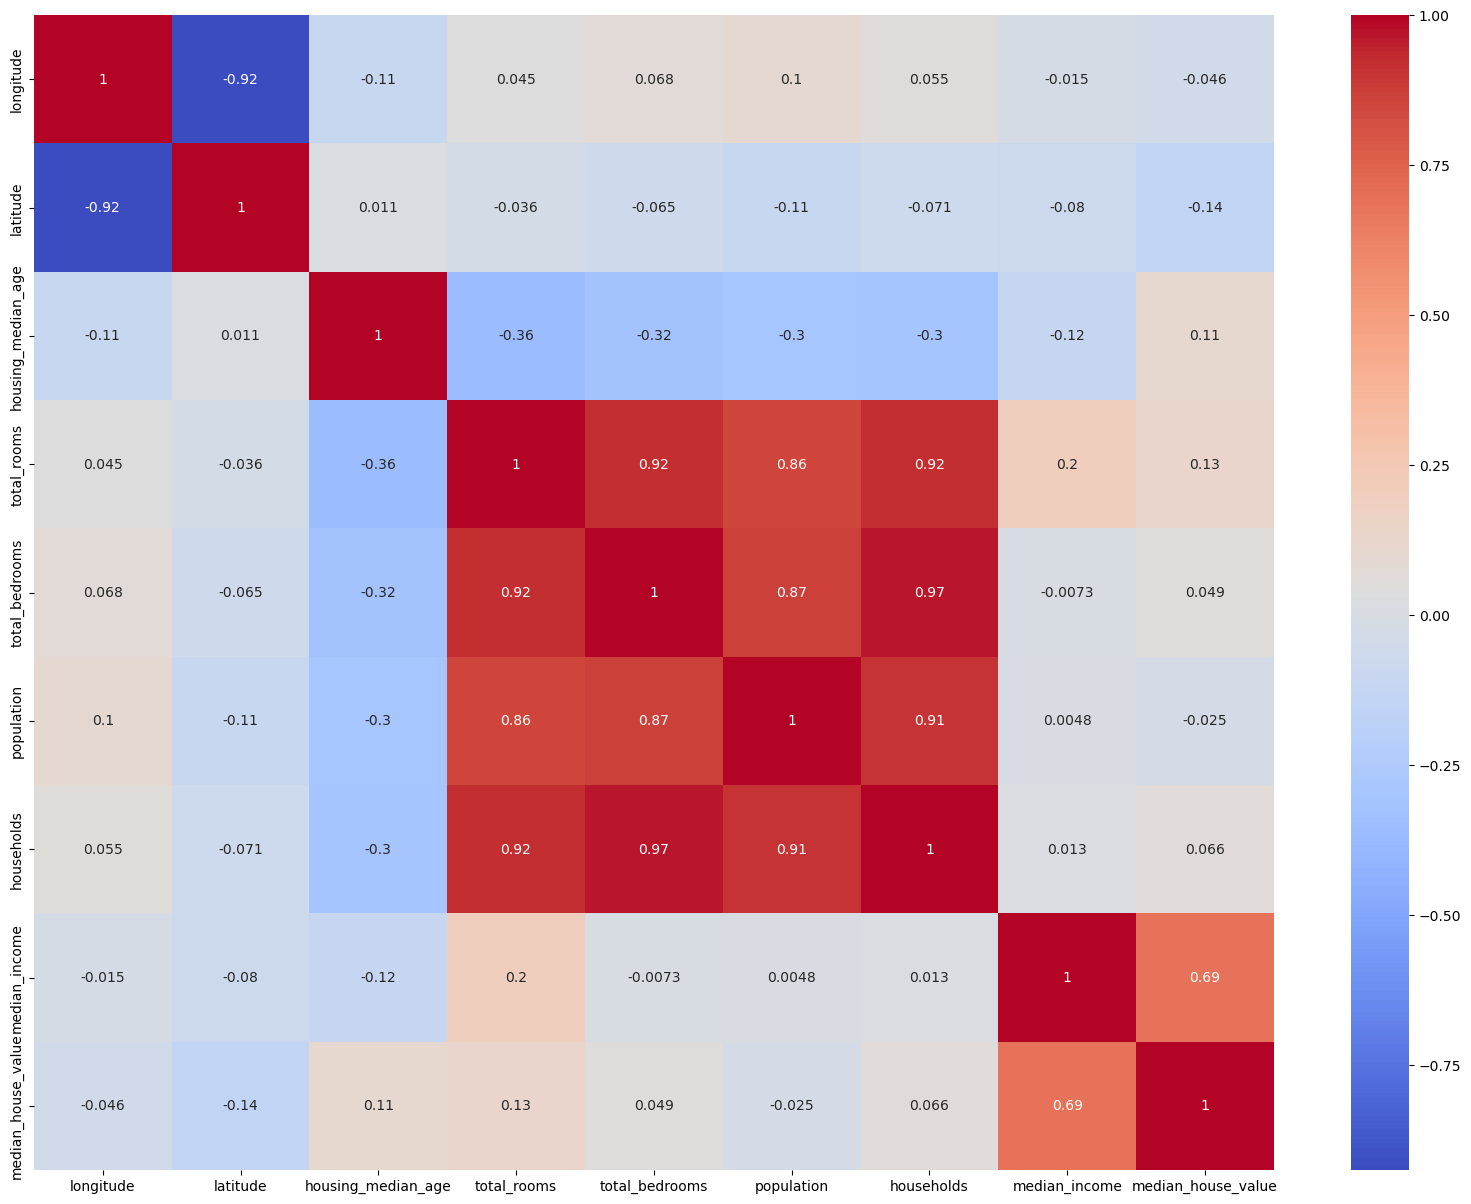

In [5]:
# Plot matrix
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [6]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Preprocessing Data

In [7]:
# Define features set
data_x = df_encoded.drop(['median_house_value', 'latitude', 'longitude'], axis =1)
y = df['median_house_value'].values.reshape(-1, 1)
X = data_x

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Splitting into testing/training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Used for scaling
scaler = StandardScaler()

# Fit scaled data
X_scaler = scaler.fit(X_train)

# Scaling data for testing/training
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create decision tree regression instance
model = DecisionTreeRegressor()

# Fit model
model = model.fit(X_train_scaled, y_train)

# Making predictions using scaled data
predictions = model.predict(X_test_scaled)

accuracy = model.score(X_test_scaled, y_test)
print(accuracy)

0.4123387219932557


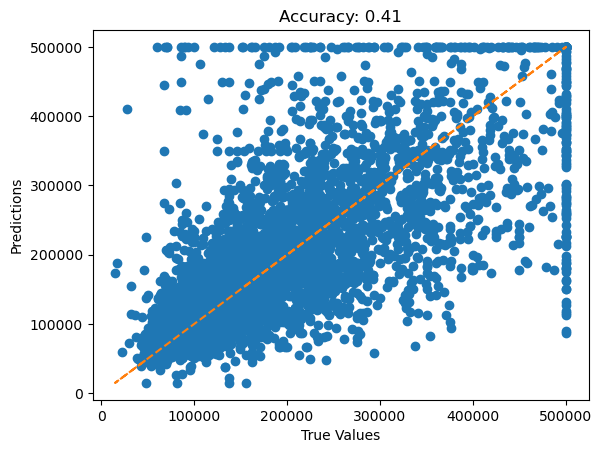

In [9]:
plt.plot(y_test, predictions, "o")
plt.plot(y_test, y_test, "--")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Accuracy: %.2f" % accuracy)
plt.show()

In [10]:
# Shows which features effect the price of the house the most
# Get the feature importance array
importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.5116096028005062, 'median_income'),
 (0.14247971066151496, 'ocean_proximity_INLAND'),
 (0.08233958776174899, 'population'),
 (0.07688574466265952, 'housing_median_age'),
 (0.06804967925780932, 'total_bedrooms'),
 (0.05299155815457173, 'total_rooms'),
 (0.050353249197506715, 'households'),
 (0.0058695208436645606, 'ocean_proximity_NEAR OCEAN'),
 (0.004695272684413377, 'ocean_proximity_<1H OCEAN'),
 (0.004278717043856863, 'ocean_proximity_NEAR BAY')]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

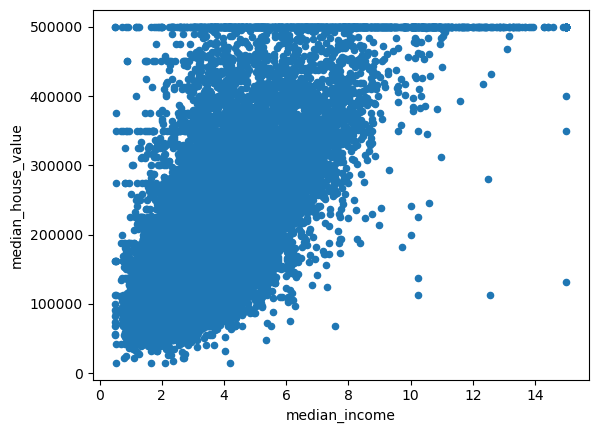

In [12]:
df[['median_house_value', 'median_income']].plot.scatter(x='median_income', y='median_house_value')

In [13]:
import pingouin as pg
pg.corr(x=df['median_income'], y=df['median_house_value'])

,n,r,CI95%,p-val,BF10,power
pearson,20640,0.688075,"[0.68, 0.7]",0.0,inf,1.0
